In [10]:
# I was bored at work. So I code for fun.
# https://en.wikipedia.org/wiki/Fractal
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import math
import numpy as np
import scipy

from utils import create_unique_color_uchar

#### Fibonacci Spiral

<IPython.core.display.Javascript object>


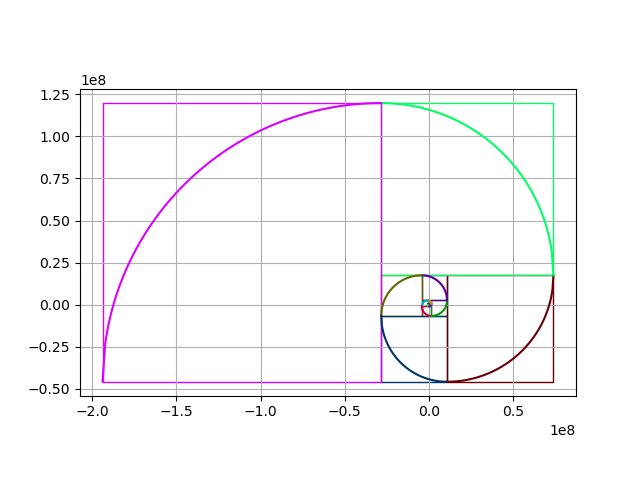

 2. 1 / 1 = 1.0
 3. 2 / 1 = 2.0
 4. 3 / 2 = 1.5
 5. 5 / 3 = 1.6666666666666667
 6. 8 / 5 = 1.6
 7. 13 / 8 = 1.625
 8. 21 / 13 = 1.6153846153846154
 9. 34 / 21 = 1.619047619047619
10. 55 / 34 = 1.6176470588235294
11. 89 / 55 = 1.6181818181818182
12. 144 / 89 = 1.6179775280898876
13. 233 / 144 = 1.6180555555555556
14. 377 / 233 = 1.6180257510729614
15. 610 / 377 = 1.6180371352785146
16. 987 / 610 = 1.618032786885246
17. 1597 / 987 = 1.618034447821682
18. 2584 / 1597 = 1.6180338134001253
19. 4181 / 2584 = 1.618034055727554
20. 6765 / 4181 = 1.6180339631667064
21. 10946 / 6765 = 1.6180339985218033
22. 17711 / 10946 = 1.618033985017358
23. 28657 / 17711 = 1.6180339901755971
24. 46368 / 28657 = 1.618033988205325
25. 75025 / 46368 = 1.618033988957902
26. 121393 / 75025 = 1.6180339886704431
27. 196418 / 121393 = 1.6180339887802426
28. 317811 / 196418 = 1.618033988738303
29. 514229 / 317811 = 1.6180339887543225
30. 832040 / 514229 = 1.6180339887482036
31. 1346269 / 832040 = 1.6180339887505408
3

In [11]:
# Fibonacci spiral with Dynamic Programming style

# Plotting prepare
fig = plt.figure()
axe = fig.add_subplot(111)

# Directions matrix for calculating bottom-left of k-th square
# wrt [[M[k-1], M[k-1]], [M[k], M[k]]]
D = np.array([
    [[0, 0], [-1,  0]],  # left
    [[0, 0], [ 0, -1]],  # down
    [[1, 0], [ 0,  0]],  # right
    [[0, 1], [ 0,  0]]   # up
])

# 1/4 of the circle for k-th square
HalfCircle = lambda x, r: (r**2 - x**2)**0.5
# Directions matrix for calculating centroid
D_centroid = np.array([
    [1, 0], # left
    [1, 1], # down
    [0, 1], # right
    [0, 0], # up
])
# Directions matrix of X range wrt [r, r]
# ignore point [0, 0] for the sake of simple
D_X = np.array([
    [-1, 0], # left  => top-left 
    [-1, 0], # down  => bottom-left
    [ 0, 1], # right => bottom-right
    [ 0, 1], # up    => top-right
])
# Directions matrix of Y range wrt to Y range
D_Y = np.array([
     1, # left  => top-left 
    -1, # down  => bottom-left
    -1, # right => bottom-right
     1, # up    => top-right
])

# Init Fibonacci sequence
n = 41 #81
M = [None] * (n + 1)
M[0], M[1] = 0, 1

# 1st Fibonacci
k = 1
bl = bl_prev = (0, 0)
color = np.array(create_unique_color_uchar(k)) / 255
axe.add_patch(
    patches.Rectangle(bl, width=M[k], height=M[k], fill=False, color=color))

# k-th Fibonacci
for k in range(2, n + 1):
    M[k] = M[k-1] + M[k-2]
    direction = (k + 3) % 4

    # square's bottom-left
    bl = (
        bl_prev +
        D[direction][0] * [M[k-1], M[k-1]] +
        D[direction][1] * [M[k], M[k]]
    )

    # 1/4 circle
    centroid = bl + D_centroid[direction] * [M[k], M[k]]
    low, high = [M[k], M[k]] * D_X[direction]
    X = np.linspace(low, high, 100)
    Y = HalfCircle(X, M[k]) * D_Y[direction]

    # Plot
    color = np.array(create_unique_color_uchar(k)) / 255
    axe.add_patch(
        patches.Rectangle(bl, width=M[k], height=M[k], fill=False, color=color))
    axe.plot(X + centroid[0], Y + centroid[1], color=color)
    print('{:2d}. {} / {} = {}'.format(k, M[k], M[k-1], M[k] / M[k-1]))
    
    # Update k-th specific parameters
    bl_prev = np.min([bl_prev, bl], axis=0)
    
print('Golden ratio: {}'.format((1 + 5**0.5) / 2))

# Show
axe.set_aspect('equal')
plt.grid(True)
plt.show()


<IPython.core.display.Javascript object>


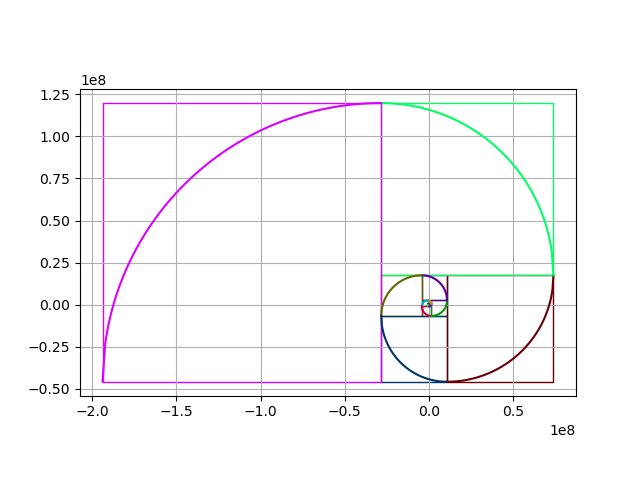

 2. 1.0 / 1.0 = 1.0
 3. 2.0 / 1.0 = 2.0
 4. 3.0000000000000004 / 2.0 = 1.5000000000000002
 5. 5.000000000000001 / 3.0000000000000004 = 1.6666666666666667
 6. 8.000000000000002 / 5.000000000000001 = 1.6
 7. 13.000000000000002 / 8.000000000000002 = 1.6249999999999998
 8. 21.000000000000004 / 13.000000000000002 = 1.6153846153846154
 9. 34.00000000000001 / 21.000000000000004 = 1.619047619047619
10. 55.000000000000014 / 34.00000000000001 = 1.6176470588235294
11. 89.00000000000003 / 55.000000000000014 = 1.6181818181818184
12. 144.00000000000006 / 89.00000000000003 = 1.6179775280898878
13. 233.00000000000006 / 144.00000000000006 = 1.6180555555555554
14. 377.00000000000017 / 233.00000000000006 = 1.6180257510729616
15. 610.0000000000003 / 377.00000000000017 = 1.6180371352785148
16. 987.0000000000005 / 610.0000000000003 = 1.6180327868852458
17. 1597.000000000001 / 987.0000000000005 = 1.618034447821682
18. 2584.000000000002 / 1597.000000000001 = 1.6180338134001255
19. 4181.000000000003 / 2584.000

In [12]:
# Fibonacci spiral calculated with Golden Ratio

# Plotting prepare
fig = plt.figure()
axe = fig.add_subplot(111)

# Directions matrix for calculating bottom-left of k-th square
# wrt [[fibo_k_1, fibo_k_1], [fibo_k, fibo_k]]
D = np.array([
    [[0, 0], [-1,  0]],  # left
    [[0, 0], [ 0, -1]],  # down
    [[1, 0], [ 0,  0]],  # right
    [[0, 1], [ 0,  0]]   # up
])

# 1/4 of the circle for k-th square
HalfCircle = lambda x, r: (r**2 - x**2)**0.5
# Directions matrix for calculating centroid
D_centroid = np.array([
    [1, 0], # left
    [1, 1], # down
    [0, 1], # right
    [0, 0], # up
])
# Directions matrix of X range wrt [r, r]
# ignore point [0, 0] for the sake of simple
D_X = np.array([
    [-1, 0], # left  => top-left 
    [-1, 0], # down  => bottom-left
    [ 0, 1], # right => bottom-right
    [ 0, 1], # up    => top-right
])
# Directions matrix of Y range wrt to Y range
D_Y = np.array([
     1, # left  => top-left 
    -1, # down  => bottom-left
    -1, # right => bottom-right
     1, # up    => top-right
])

# Closed-form expression of Fibonacci sequence
phi = (1 + 5**0.5) / 2
Fibo = lambda k: (phi**k - (-phi)**-k) / 5**0.5
n = 41 #81

# 1st Fibonacci
k = 1
fibo_k = fibo_k_1 = Fibo(k)
bl = bl_prev = (0, 0)
color = np.array(create_unique_color_uchar(k)) / 255
axe.add_patch(
    patches.Rectangle(bl, width=fibo_k, height=fibo_k, fill=False, color=color))

# k-th Fibonacci
for k in range(2, n + 1):
    fibo_k = Fibo(k)
    direction = (k + 3) % 4

    # square's bottom-left
    bl = (
        bl_prev +
        D[direction][0] * [fibo_k_1, fibo_k_1] +
        D[direction][1] * [fibo_k, fibo_k]
    )

    # 1/4 circle
    centroid = bl + D_centroid[direction] * [fibo_k, fibo_k]
    low, high = [fibo_k, fibo_k] * D_X[direction]
    X = np.linspace(low, high, 100)
    Y = HalfCircle(X, fibo_k) * D_Y[direction]

    # Plot
    color = np.array(create_unique_color_uchar(k)) / 255
    axe.add_patch(
        patches.Rectangle(bl, width=fibo_k, height=fibo_k, fill=False, color=color))
    axe.plot(X + centroid[0], Y + centroid[1], color=color)
    print('{:2d}. {} / {} = {}'.format(k, fibo_k, fibo_k_1, fibo_k / fibo_k_1))
    
    # Update k-th specific parameters
    bl_prev = np.min([bl_prev, bl], axis=0)
    fibo_k_1 = fibo_k
    
print('Golden ratio: {}'.format((1 + 5**0.5) / 2))

# Show
axe.set_aspect('equal')
plt.grid(True)
plt.show()
